In [3]:
import pandas as pd
import seaborn as sns

In [4]:
data = pd.read_csv("csv_files/AB_NYC_2019_1.csv")

In [5]:
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19-10-2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21-05-2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,05-07-2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,19-11-2018,0.10,1,0


In [6]:
data.shape

(48906, 16)

In [7]:
# now we will delete the rows having nan values along with the duplicate values
data.dropna(inplace = True)
data.drop_duplicates(inplace = True)

In [8]:
data.shape

(38821, 16)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38821 entries, 0 to 48852
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              38821 non-null  int64  
 1   name                            38821 non-null  object 
 2   host_id                         38821 non-null  int64  
 3   host_name                       38821 non-null  object 
 4   neighbourhood_group             38821 non-null  object 
 5   neighbourhood                   38821 non-null  object 
 6   latitude                        38821 non-null  float64
 7   longitude                       38821 non-null  float64
 8   room_type                       38821 non-null  object 
 9   price                           38821 non-null  int64  
 10  minimum_nights                  38821 non-null  int64  
 11  number_of_reviews               38821 non-null  int64  
 12  last_review                     38821

In [10]:
# now we datatype correction
data['id']=data['id'].astype('str')
data['host_id'] = data['host_id'].astype('str')
data['latitude']=data['latitude'].astype('str')
data['longitude']=data['longitude'].astype('str')
data['last_review']=pd.to_datetime(data['last_review'])

C:\Users\RETAM\AppData\Local\Temp\ipykernel_18732\3403650985.py:6: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['last_review']=pd.to_datetime(data['last_review'])


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38821 entries, 0 to 48852
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              38821 non-null  object        
 1   name                            38821 non-null  object        
 2   host_id                         38821 non-null  object        
 3   host_name                       38821 non-null  object        
 4   neighbourhood_group             38821 non-null  object        
 5   neighbourhood                   38821 non-null  object        
 6   latitude                        38821 non-null  object        
 7   longitude                       38821 non-null  object        
 8   room_type                       38821 non-null  object        
 9   price                           38821 non-null  int64         
 10  minimum_nights                  38821 non-null  int64         
 11  number_

In [12]:
data.describe()

,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
count,38821.000000,38821.000000,38821.000000,38821,38821.000000,38821.000000,38821.000000
mean,142.332526,5.869220,29.290255,2018-10-04 07:23:47.072975872,1.373229,5.166611,114.886299
min,0.000000,1.000000,1.000000,2011-03-28 00:00:00,0.010000,1.000000,0.000000
25%,69.000000,1.000000,3.000000,2018-07-09 00:00:00,0.190000,1.000000,0.000000
50%,101.000000,2.000000,9.000000,2019-05-19 00:00:00,0.720000,1.000000,55.000000
75%,170.000000,4.000000,33.000000,2019-06-23 00:00:00,2.020000,2.000000,229.000000
max,10000.000000,1250.000000,629.000000,2019-07-08 00:00:00,58.500000,327.000000,365.000000
std,196.994756,17.389026,48.182900,NaN,1.680328,26.302954,129.529950


In [13]:
# doing non graphical data analysis
data.nunique()

id                                38821
name                              38244
host_id                           30232
host_name                          9885
neighbourhood_group                   5
neighbourhood                       218
latitude                          17436
longitude                         13639
room_type                             3
price                               581
minimum_nights                       89
number_of_reviews                   393
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64

In [14]:
data['neighbourhood_group'].value_counts()

neighbourhood_group
Manhattan        16621
Brooklyn         16439
Queens            4572
Bronx              875
Staten Island      314
Name: count, dtype: int64

In [15]:
data['neighbourhood_group'].value_counts(normalize=True)

neighbourhood_group
Manhattan        0.428145
Brooklyn         0.423456
Queens           0.117771
Bronx            0.022539
Staten Island    0.008088
Name: proportion, dtype: float64

In [16]:
data['room_type'].value_counts()

room_type
Entire home/apt    20321
Private room       17654
Shared room          846
Name: count, dtype: int64

In [17]:
data['room_type'].value_counts(normalize = True)

room_type
Entire home/apt    0.523454
Private room       0.454754
Shared room        0.021792
Name: proportion, dtype: float64

In [18]:
data['neighbourhood'].value_counts()

neighbourhood
Williamsburg          3163
Bedford-Stuyvesant    3141
Harlem                2204
Bushwick              1942
Hell's Kitchen        1528
                      ... 
Holliswood               2
New Dorp Beach           2
Richmondtown             1
Rossville                1
Willowbrook              1
Name: count, Length: 218, dtype: int64

In [19]:
data['neighbourhood'].value_counts(normalize = True)

neighbourhood
Williamsburg          0.081477
Bedford-Stuyvesant    0.080910
Harlem                0.056773
Bushwick              0.050024
Hell's Kitchen        0.039360
                        ...   
Holliswood            0.000052
New Dorp Beach        0.000052
Richmondtown          0.000026
Rossville             0.000026
Willowbrook           0.000026
Name: proportion, Length: 218, dtype: float64

In [20]:
df_n = data['neighbourhood'].value_counts().reset_index().rename(columns={"count":"No_of_hotels"})

In [21]:
df_n

,neighbourhood,No_of_hotels
0,Williamsburg,3163
1,Bedford-Stuyvesant,3141
2,Harlem,2204
3,Bushwick,1942
4,Hell's Kitchen,1528
...,...,...
213,Holliswood,2
214,New Dorp Beach,2
215,Richmondtown,1
216,Rossville,1


In [22]:
# neighbourhoods in NYC which have the no of hotels greater than 1000

In [23]:
df_n[df_n['No_of_hotels']>500]

,neighbourhood,No_of_hotels
0,Williamsburg,3163
1,Bedford-Stuyvesant,3141
2,Harlem,2204
3,Bushwick,1942
4,Hell's Kitchen,1528
5,East Village,1489
6,Upper West Side,1482
7,Upper East Side,1405
8,Crown Heights,1265
9,Midtown,986


In [24]:
# now we will do our analysis with the numerical columns

In [25]:
data['price'].value_counts(bins=5)
# this divides the price data into five parts

(-10.001, 2000.0]    38786
(2000.0, 4000.0]        20
(4000.0, 6000.0]         8
(8000.0, 10000.0]        5
(6000.0, 8000.0]         2
Name: count, dtype: int64

In [26]:
bins=(0,50,100,200,500,2000,10000)

In [27]:
data['price'].value_counts(bins=bins)

(50.0, 100.0]        14212
(100.0, 200.0]       13544
(200.0, 500.0]        5267
(-0.001, 50.0]        5176
(500.0, 2000.0]        587
(2000.0, 10000.0]       35
Name: count, dtype: int64

In [28]:
data['price'].mean()

142.33252621004095

In [29]:
data['price'].std()

196.99475591833985

In [30]:
data['price'].skew()
# gives the skeweness of the graph

23.673594295123014

In [31]:
data['price'].kurt()
# kind of gives the measurement of the height of the graph

953.4807356344944

In [32]:
data.corr()

ValueError: could not convert string to float: 'Clean & quiet apt home by the park'

In [33]:
# univariate _categorical(grpahical)

<Axes: xlabel='neighbourhood_group', ylabel='count'>

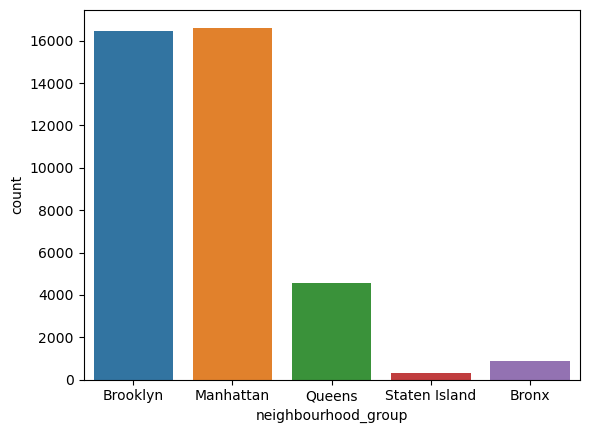

In [35]:
sns.countplot(data=data,x='neighbourhood_group')

<Axes: xlabel='room_type', ylabel='count'>

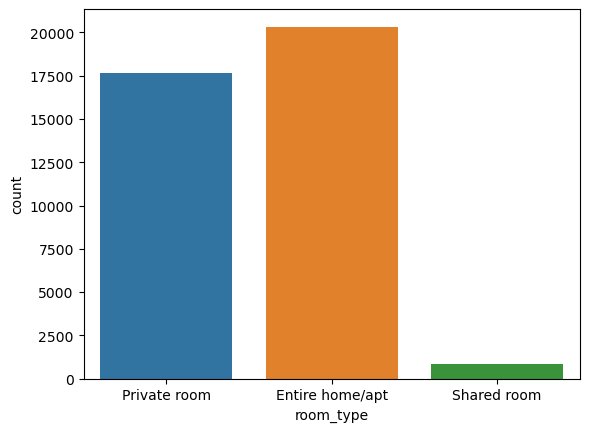

In [37]:
sns.countplot(data=data, x='room_type')

<Axes: xlabel='neighbourhood_group', ylabel='count'>

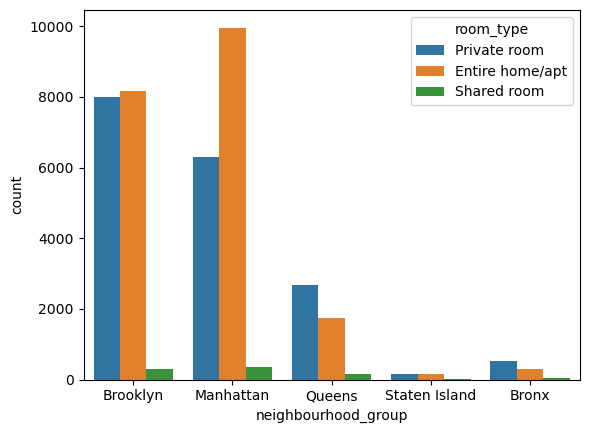

In [39]:
sns.countplot(data=data,x='neighbourhood_group',hue='room_type')

In [ ]:
#pie chart

<Axes: ylabel='count'>

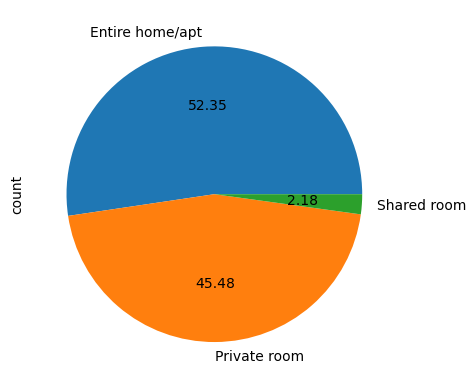

In [41]:
data['room_type'].value_counts().plot(kind='pie',autopct='%.2f')


<Axes: ylabel='count'>

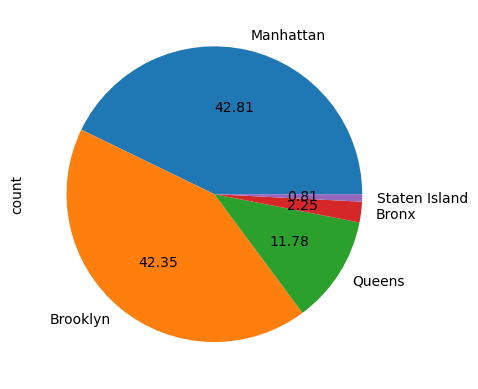

In [43]:
data['neighbourhood_group'].value_counts().plot(kind='pie',autopct="%.2f")

<Axes: xlabel='room_type'>

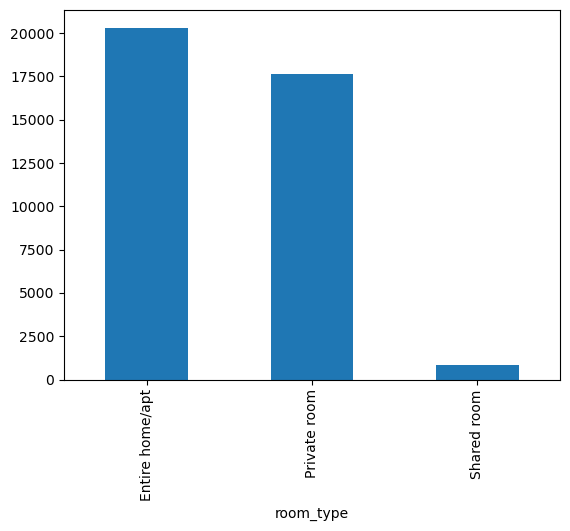

In [45]:
data['room_type'].value_counts().plot(kind='bar')


In [ ]:
# here we will use the titanic dataset which we will import from the seaborn library

In [47]:
df=sns.load_dataset('titanic')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


<Axes: xlabel='survived', ylabel='count'>

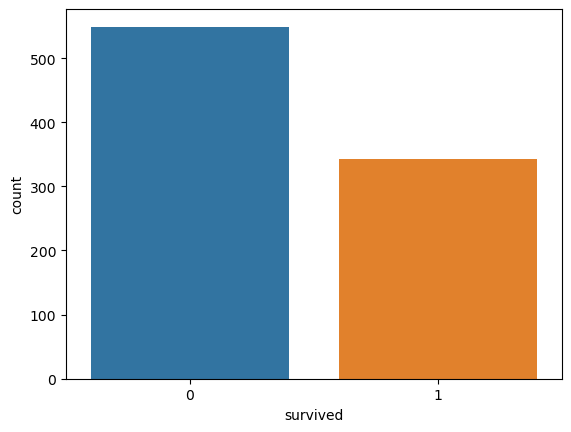

In [49]:
sns.countplot(data=df,x='survived')
# 0 for dead and survived

<Axes: xlabel='survived', ylabel='count'>

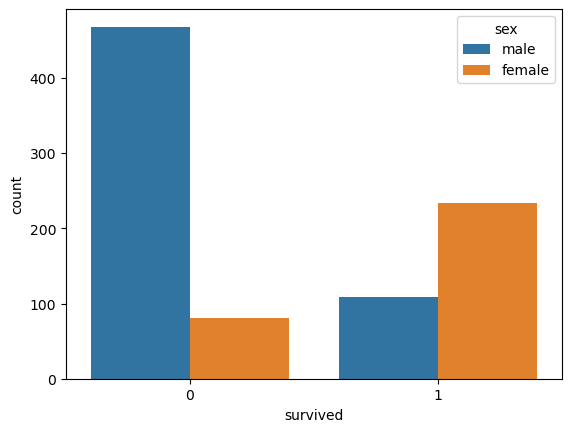

In [51]:
sns.countplot(data=df,x='survived',hue='sex')
# 0 for dead and survived

<Axes: xlabel='survived', ylabel='count'>

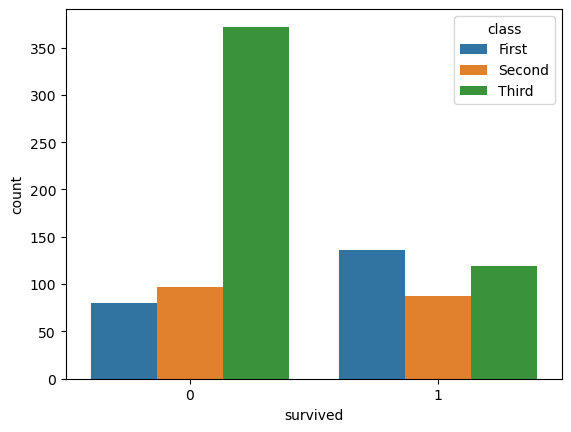

In [53]:
sns.countplot(data=df,x='survived',hue='class')
# 0 for dead and survived

C:\Users\RETAM\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\RETAM\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


AttributeError: 'numpy.int64' object has no attribute 'startswith'

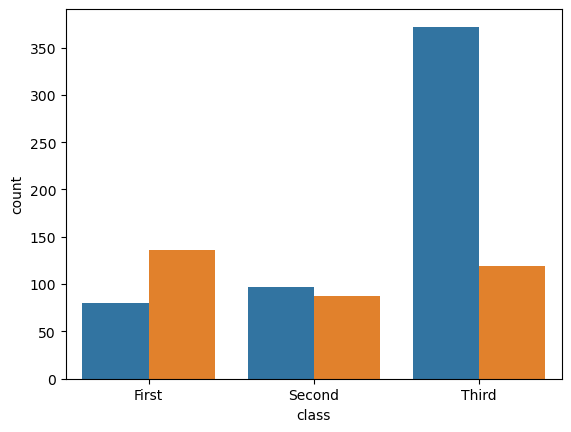

In [57]:
sns.countplot(data=df,x='class',hue='survived')
# 0 for dead and survived

<Axes: ylabel='count'>

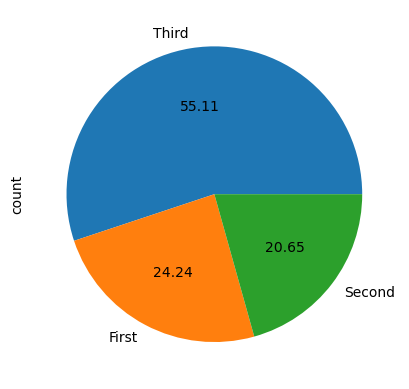

In [59]:
df['class'].value_counts().plot(kind='pie',autopct='%.2f')

C:\Users\RETAM\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\RETAM\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='class', ylabel='count'>

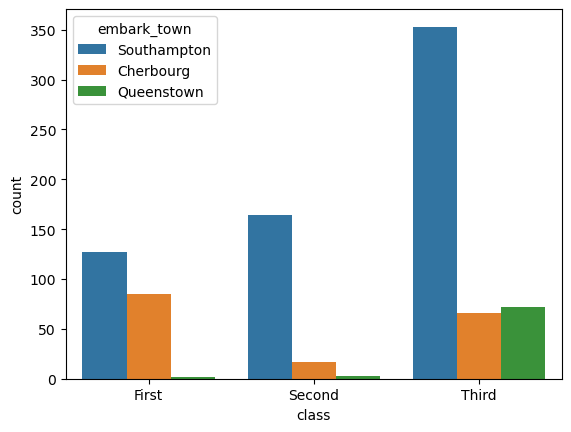

In [61]:
sns.countplot(data=df,x='class',hue='embark_town')

AttributeError: 'numpy.bool_' object has no attribute 'startswith'

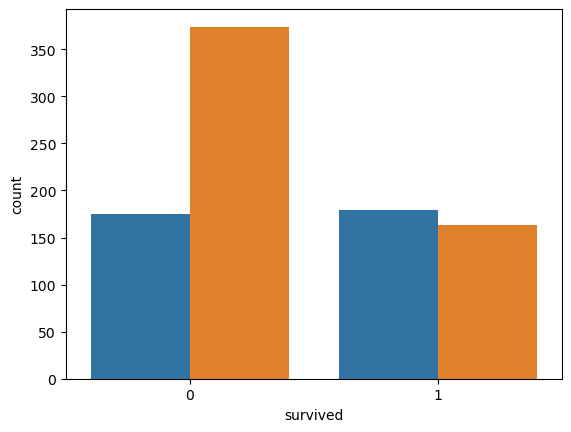

In [63]:
sns.countplot(data=df,x='survived',hue='alone')